In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | tazovsky
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | el granada
Processing Record 6 of Set 1 | sandnessjoen
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | tual
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | dunedin
Processing Record 13 of Set 1 | uturoa
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | sinjai
Processing Record 17 of Set 1 | palikir - national government center
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | saudarkrokur
Processing Record 21 of Set 1 |

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,59.90,77,90,17.90,SH,1712101041
1,tazovsky,67.4667,78.7000,26.29,96,100,15.55,RU,1712101042
2,puerto natales,-51.7236,-72.4875,38.75,72,31,11.41,CL,1712101042
3,georgetown,5.4112,100.3354,83.95,89,20,3.44,MY,1712100783
4,el granada,37.5027,-122.4694,78.48,77,0,13.80,US,1712101019


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,59.90,77,90,17.90,SH,1712101041
1,tazovsky,67.4667,78.7000,26.29,96,100,15.55,RU,1712101042
2,puerto natales,-51.7236,-72.4875,38.75,72,31,11.41,CL,1712101042
3,georgetown,5.4112,100.3354,83.95,89,20,3.44,MY,1712100783
4,el granada,37.5027,-122.4694,78.48,77,0,13.80,US,1712101019


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

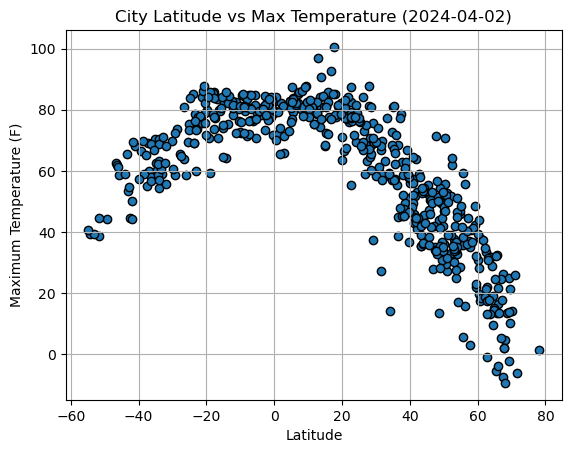

In [20]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x,y,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("City Latitude vs Max Temperature (2024-04-02)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

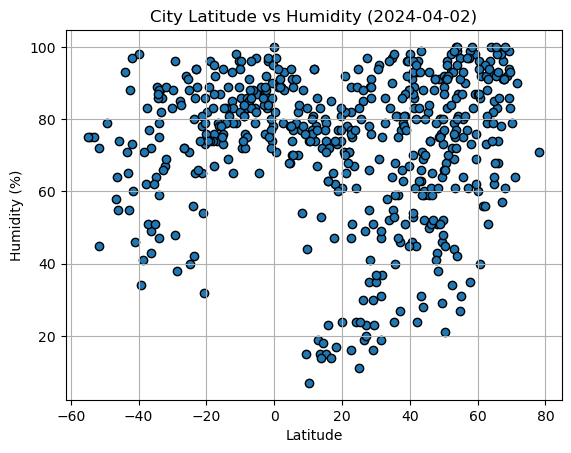

In [15]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x,y,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2024-04-02)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

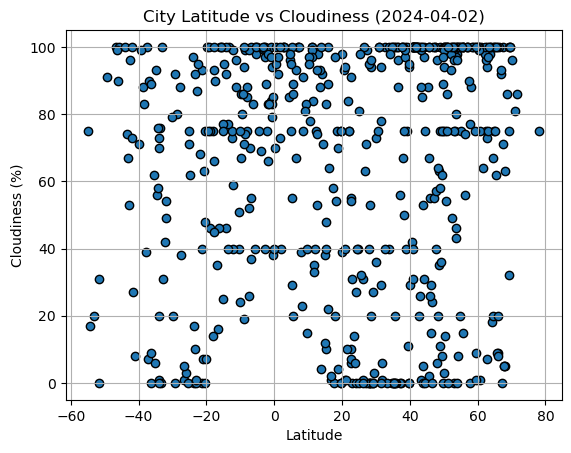

In [16]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x,y,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2024-04-02)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

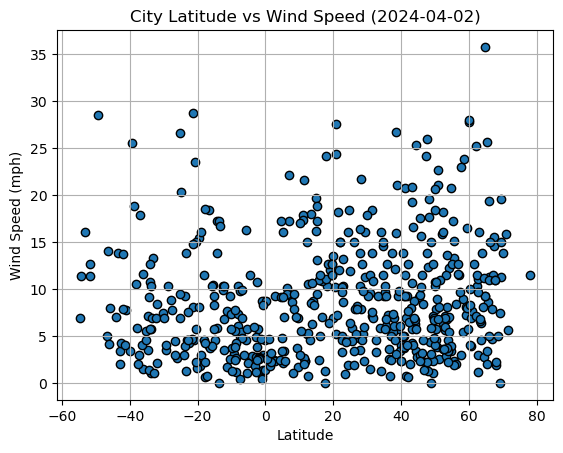

In [17]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x,y,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (2024-04-02)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def linearplot(x,y,x_cord,y_cord):
    plt.scatter(x,y)
    slope, intercept, r, p, se = linregress(x, y)
    plt.plot(x, intercept + slope*x, 'r', label='fitted line')
    print(f"The r-value is: {r**2}")
    eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.annotate(eq,xy = (x_cord,y_cord),fontsize = 15, color = "r")
    # Incorporate the other graph properties
    plt.xlabel("Latitude")
    plt.ylabel(y.name)
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tazovsky,67.4667,78.7000,26.29,96,100,15.55,RU,1712101042
3,georgetown,5.4112,100.3354,83.95,89,20,3.44,MY,1712100783
4,el granada,37.5027,-122.4694,78.48,77,0,13.80,US,1712101019
5,sandnessjoen,66.0217,12.6316,16.32,68,9,11.27,NO,1712101043
6,qaqortoq,60.7167,-46.0333,17.51,86,1,3.96,GL,1712101044


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,59.90,77,90,17.90,SH,1712101041
2,puerto natales,-51.7236,-72.4875,38.75,72,31,11.41,CL,1712101042
7,papatowai,-46.5619,169.4708,62.42,58,100,5.03,NZ,1712101044
8,bengkulu,-3.8004,102.2655,78.13,89,69,2.84,ID,1712101045
9,tual,-5.6667,132.7500,81.57,83,100,16.26,ID,1712101045


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7796436276728634


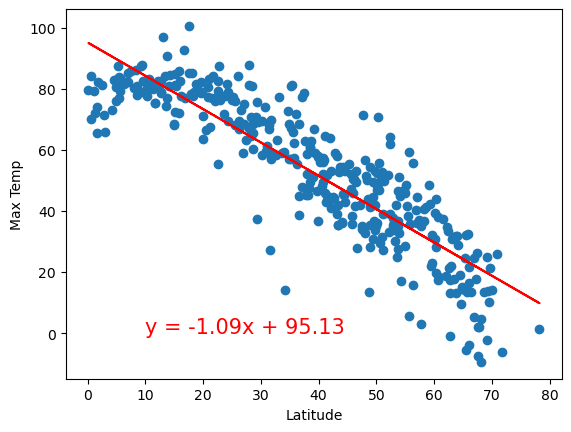

In [47]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linearplot(x,y,10,0)

The r-value is: 0.6359016976349874


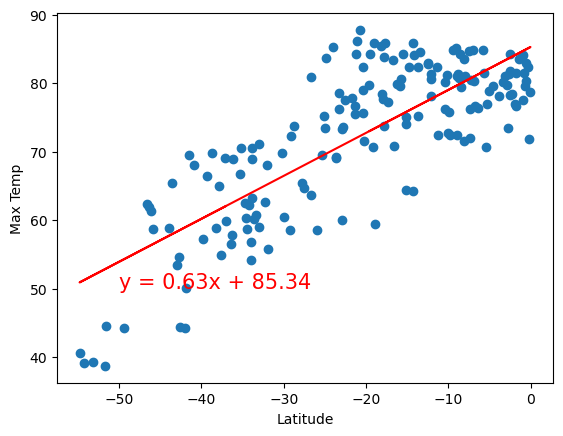

In [49]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linearplot(x,y,-50,50)

**Discussion about the linear relationship:** In the Northern Hemisphere, There is a strong negative correlation between latitude and temperature. In the Southern Hemisphere, there is a positive correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.036313407958630584


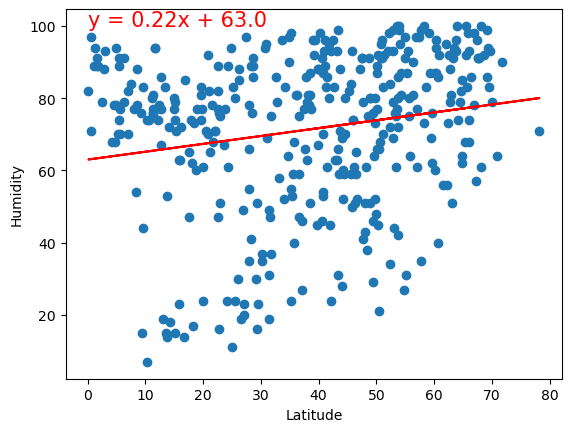

In [66]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linearplot(x,y,0,100)

The r-value is: 0.1805209928914291


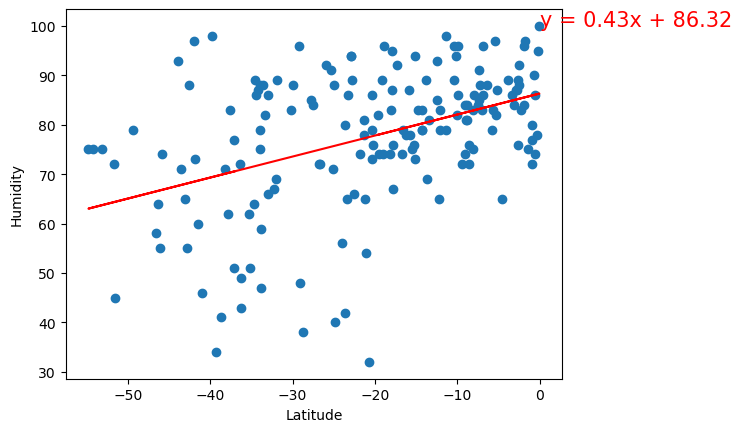

In [68]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linearplot(x,y,0,100)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.007929563049874591


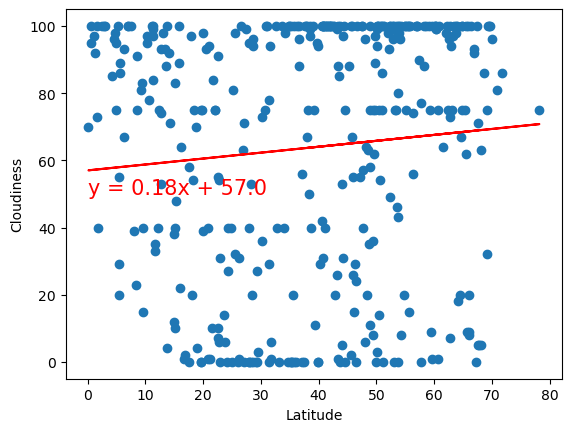

In [69]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linearplot(x,y,0,50)

The r-value is: 0.06405289941979868


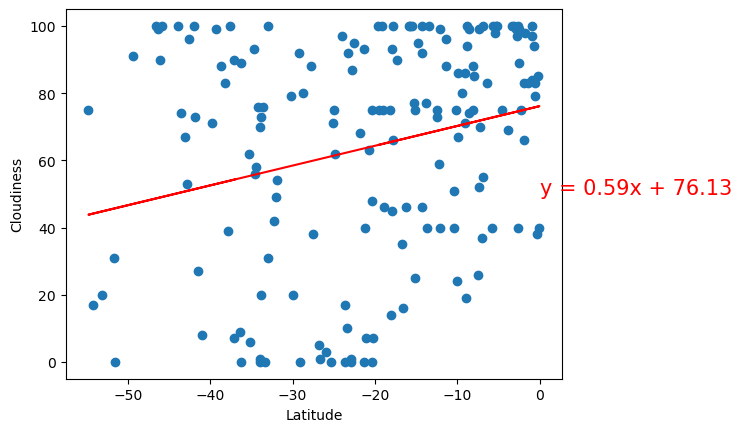

In [70]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linearplot(x,y,0,50)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0067373211030833345


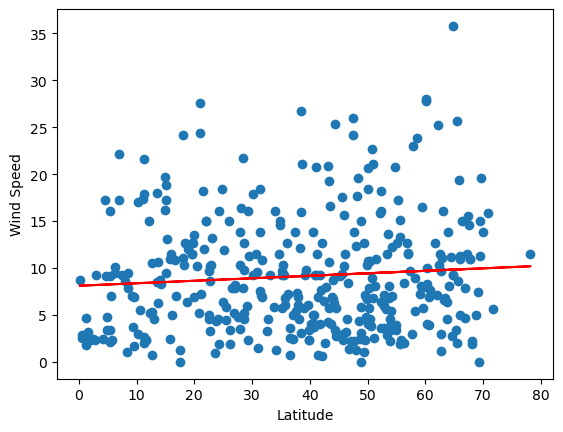

In [79]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linearplot(x,y,80,100)

The r-value is: 0.06606466782934281


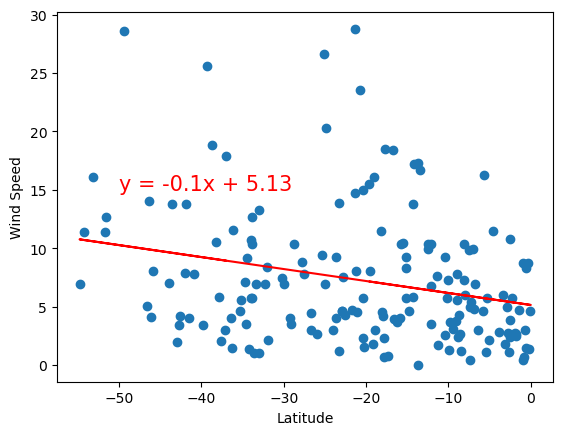

In [73]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linearplot(x,y,-50,15)

**Discussion about the linear relationship:**

In [ ]:
# In the Northern Hemisphere, There is a very weak positive correlation between latitude and wind speed. In the Southern Hemisphere, there is a negative correlation between latitude and wind speed.